<center><h1>DSCI-552 HW_1</h1></center>
<br>
<center><font size="4">Vertebral Column Data Set</font></center>
<center><font size="4">Name: Jiade Song GitHubID: JiadeSong USCID: 9019610285 </font></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.neighbors import DistanceMetric
import warnings
warnings.filterwarnings('ignore')

### (b) Pre-Processing and Exploratory data analysis:
    # i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [2]:
attributes = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", \
              "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis","class"]
Data2C = pd.read_csv('../data/vertebral_column_data/column_2C.dat', delimiter=' ', \
                     names=attributes)
# Assign all attributes in to column_2C.dat data.
Data2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
df = pd.DataFrame(Data2C)
df["class"].unique()
# Confirm if all rows are identified as 'AB' or 'NO'. The conclusion is yes.

array(['AB', 'NO'], dtype=object)

In [4]:
df["class"].replace({"AB": 1, "NO": 0}, inplace=True)
# This code example is from https://www.kite.com/python/answers/how-to-
# replace-column-values-in-a-pandas-dataframe-in-python

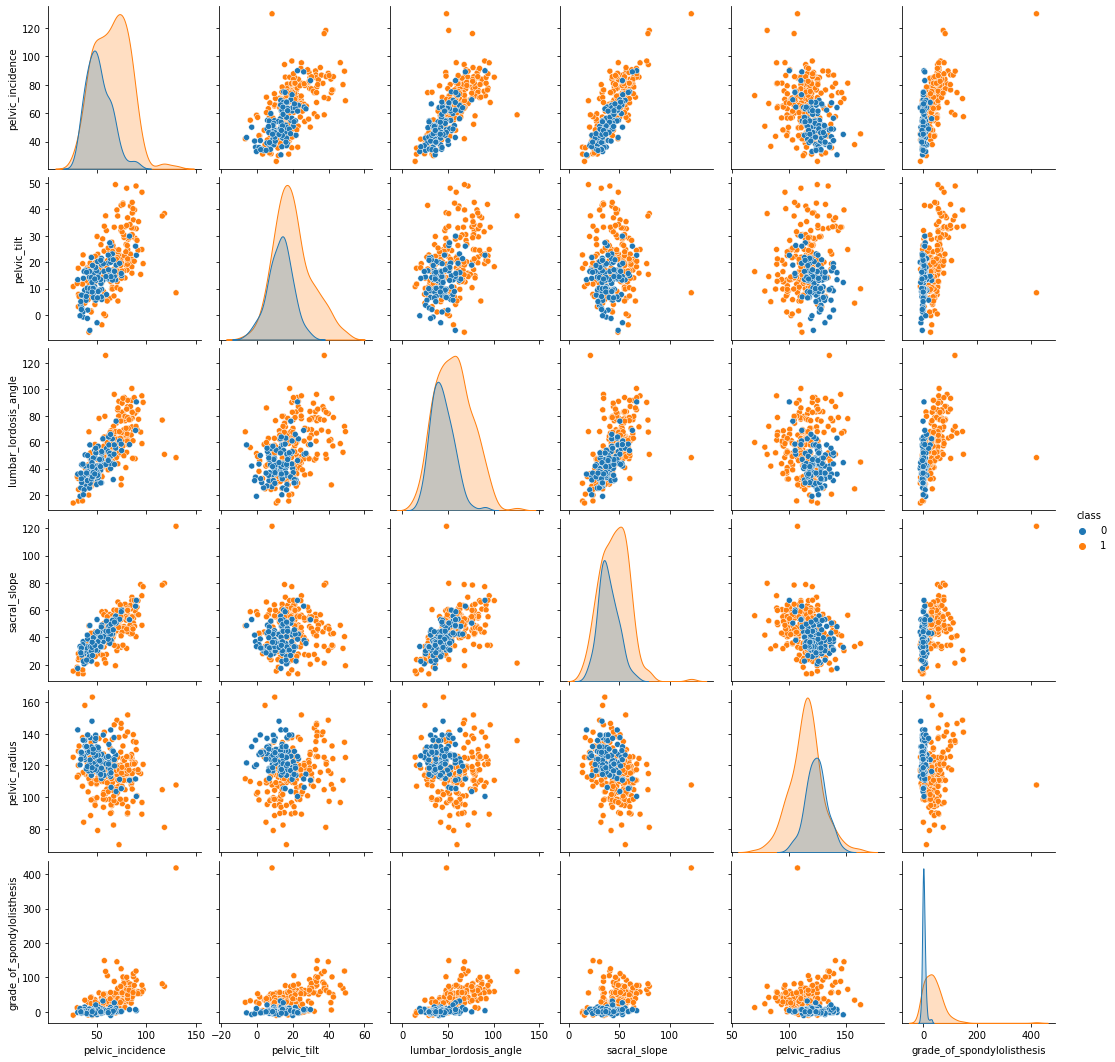

In [5]:
sns.pairplot(df,vars=df.columns[:-1], hue='class');

    # ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1(see ISLR p.129)

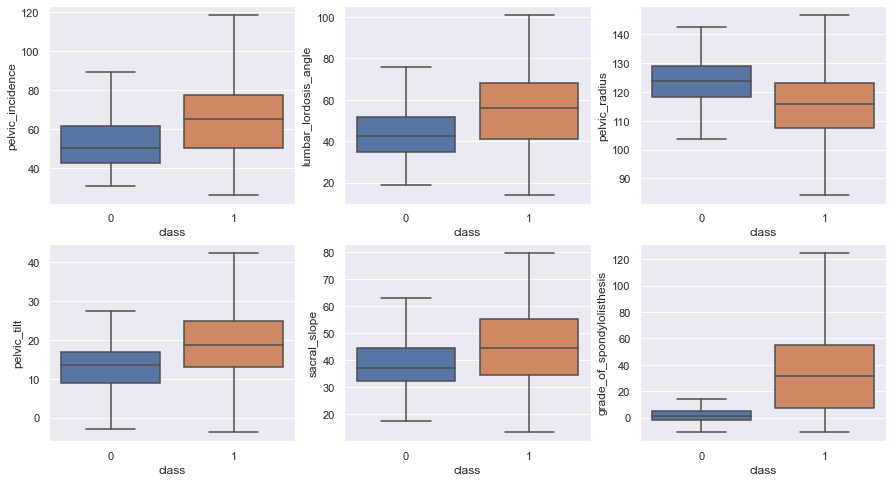

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
f, axes = plt.subplots(2, 3)
k = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(x="class", y=df.iloc[:, k], data=df, ax=axes[j,i],showfliers = False)
        k = k+1 

       # iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [7]:
Training_data0 = df[df['class'] == 0][:70]
test_data0 = df[df['class'] == 0][70:]
Training_data1 = df[df['class'] == 1][:140]
test_data1 = df[df['class'] == 1][140:]
Training_data = Training_data0.append(Training_data1)
test_data = test_data0.append(test_data1)
print('Training_data size is: '+str(len(Training_data)))
print('test_data size is: '+str(len(test_data)))
Training_data_x = Training_data.drop(columns=['class'])
Training_data_y = Training_data['class']
test_data_x = test_data.drop(columns=['class'])
test_data_y = test_data['class']

Training_data size is: 210
test_data size is: 100


### (c) Classification using KNN on Vertebral Column Data Set
    # i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [8]:
def fitknn(K, trainingx, trainingy):
    knn = KNeighborsClassifier(n_neighbors=K, metric="euclidean")
    knn.fit(trainingx, trainingy)
    return knn

    # ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, ..., 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*2.

the optimal k is: 4


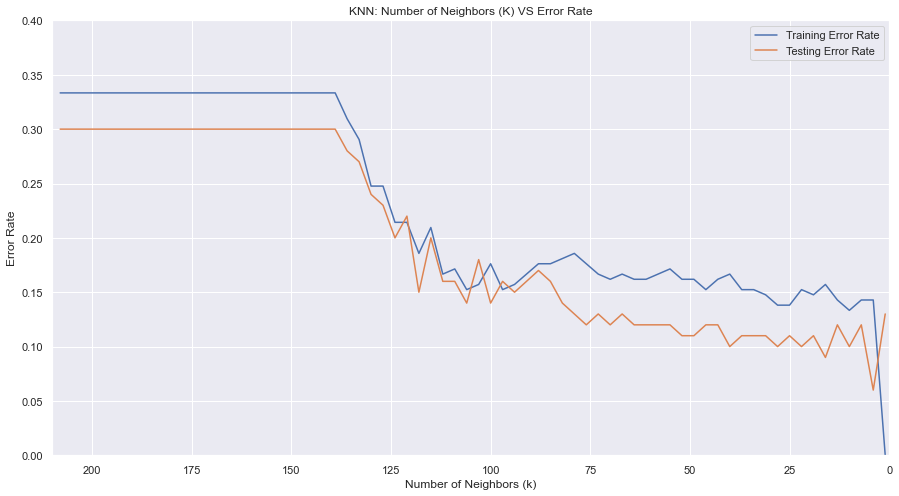

In [9]:
K_set = list(range(208,0,-3))

def runfitknn(i, train_x, train_y, test_x, test_y): 
    knn = fitknn(i, train_x, train_y)
    pred_y = knn.predict(test_x)
    train_error = knn.score(train_x,train_y)
    test_error = knn.score(test_x,test_y)
    return train_error, test_error, pred_y

def geterrors(train_x, train_y, test_x, test_y, Kset):
    test_error_set = []
    train_error_set = []
    for i in Kset:
        runfitknn_res = runfitknn(i, train_x, train_y, test_x, test_y)
        train_error_set.append(1-runfitknn_res[0])
        test_error_set.append(1-runfitknn_res[1])
    min_index = test_error_set.index(min(test_error_set))
    BEST_K = Kset[min_index]
    return train_error_set, test_error_set, BEST_K

geterrors_result = geterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, K_set);
print('the optimal k is: '+str(geterrors_result[2]))

plt.title('KNN: Number of Neighbors (K) VS Error Rate')
plt.plot(K_set, geterrors_result[0], label = 'Training Error Rate')
plt.axis([max(K_set),min(K_set),min(geterrors_result[0]),max(geterrors_result[1])])
plt.plot(K_set, geterrors_result[1], label = 'Testing Error Rate')
plt.ylim((0,0.4))
plt.xlim((210,0))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.legend();

    The most suitable k among those values is 4. 

In [10]:
Best_K = geterrors_result[2]
bestfit = runfitknn(Best_K, Training_data_x, Training_data_y, test_data_x, \
                             test_data_y)

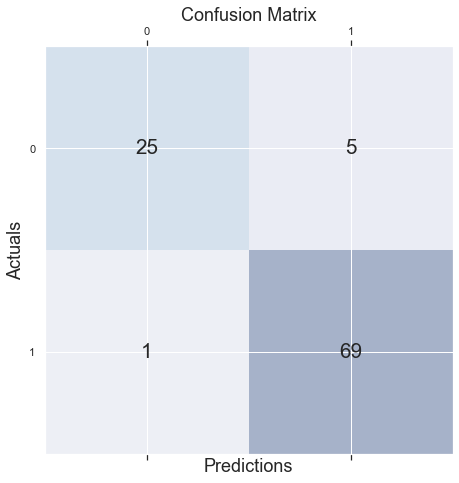

In [11]:
tn, fp, fn, tp = confusion_matrix(test_data_y, bestfit[2]).ravel()
cm = confusion_matrix(test_data_y, bestfit[2])
true_positive_rate = recall_score(test_data_y, bestfit[2])
true_negative_rate = tn/(tn+fp)
precision = tp/(tp+fp)
F1_score = 2*(precision*true_positive_rate)/((precision+true_positive_rate))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# plot confusion matrix code from: https:
# //vitalflux.com/python-draw-confusion-matrix-matplotlib/

In [12]:
print('true positive rate: ' + str(true_positive_rate))
print('true negative rate: ' + str(true_negative_rate))
print('precision: ' + str(precision))
print('F1-score: ' + str(F1_score))

true positive rate: 0.9857142857142858
true negative rate: 0.8333333333333334
precision: 0.9324324324324325
F1-score: 0.9583333333333333


    # iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

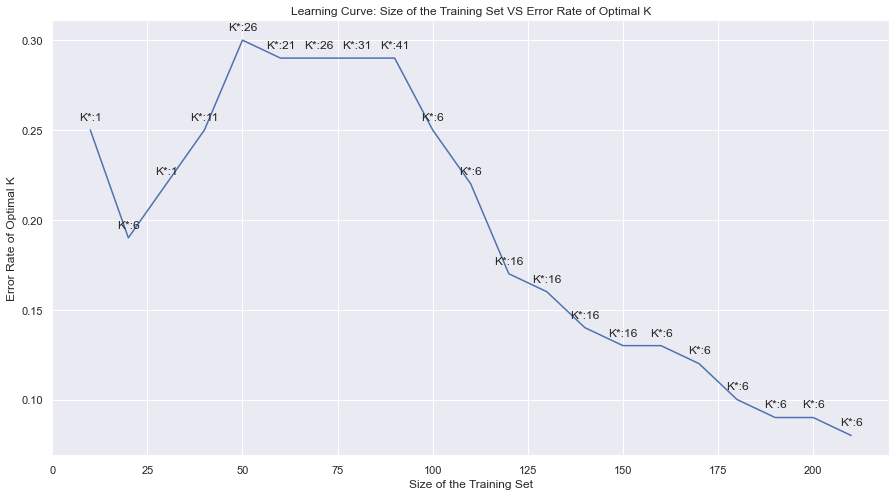

In [13]:
N_set = np.array(list(range(10,211,10)))
new_k_set = list(range(1,210,5))

def ChangeSize(Size_0, Size_1, Training_0, Training_1):
    Train0 = Training_0[:int(Size_0)]
    Train1 = Training_1[:int(Size_1)]
    Train = Train0.append(Train1)
    Training_x = Train.drop(columns=['class'])
    Training_y = Train['class']
    return Training_x, Training_y

def LearningCurve(Training_data0, Training_data1, test_x, test_y, N_set, new_k_set):
    Train_size_0 = [round(number / 3,0) for number in N_set]
    Train_size_1 = [round(number - number / 3,0) for number in N_set]
    learn_error_set = []
    best_k_set = []
    
    for i in range(0, len(N_set)):
        Size_0 = Train_size_0[i]
        Size_1 = Train_size_1[i]
        Train_x, Train_y = ChangeSize(Size_0, Size_1, Training_data0, Training_data1)
        lr_res = geterrors(Train_x, Train_y, test_x, test_y, new_k_set[0:2*(i+1)])
        best_K = lr_res[2]
        smallest_error_rate = min(lr_res[1])
        learn_error_set.append(smallest_error_rate)
        best_k_set.append(lr_res[2])
#         print('the optimal k is: '+str(best_K))
    return learn_error_set, best_k_set
        
learn_error_set = LearningCurve(Training_data0, Training_data1, test_data_x, \
                                test_data_y, N_set, new_k_set)
# learn_error_set
plt.xlabel('Size of the Training Set')
plt.ylabel('Error Rate of Optimal K')
plt.title('Learning Curve: Size of the Training Set VS Error Rate of Optimal K')
plt.plot(list(N_set),learn_error_set[0]);

for x,y in zip(N_set,learn_error_set[0]):
    label = 'K*:' + str(learn_error_set[1][(list(N_set).index(x))])
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center') 
# This plot with note code is from: https://stackoverflow.com/
# questions/63335402/python-show-value-in-line-chart

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.
    # i. Minkowski Distance:
        A. which becomes Manhattan Distance with p = 1.

In [14]:
def Minfitknn(K, trainingx, trainingy, p):
    knn = KNeighborsClassifier(n_neighbors=K, metric="minkowski", p=p)
    knn.fit(trainingx, trainingy)
    return knn

def Minrunfitknn(i, train_x, train_y, test_x, test_y, p): 
    knn = Minfitknn(i, train_x, train_y, p)
    pred_y = knn.predict(test_x)
    train_error = knn.score(train_x,train_y)
    test_error = knn.score(test_x,test_y)
    return train_error, test_error, pred_y

def Mingeterrors(train_x, train_y, test_x, test_y, Kset, p):
    test_error_set = []
    train_error_set = []
    for i in Kset:
        runfitknn_res = Minrunfitknn(i, train_x, train_y, test_x, test_y, p)
        train_error_set.append(1-runfitknn_res[0])
        test_error_set.append(1-runfitknn_res[1])
    min_index = test_error_set.index(min(test_error_set))
    BEST_K = Kset[min_index]
    return train_error_set, test_error_set, BEST_K

In [15]:
D_new_k_set = list(range(1,200,5))
Mingeterrors_result = Mingeterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, D_new_k_set, 1);
table1 = pd.DataFrame({'p value': [1], 'Optimal K': [Mingeterrors_result[2]], \
                       'Min Error Rate': [min(Mingeterrors_result[1])]})
table1

,p value,Optimal K,Min Error Rate
0,1,6,0.11


    Answer: If ues the k set in (d), the optimal K is 6, but the optimal K is 4 if K set increment is only 1. 

        B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k* you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [16]:
log10p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
p_set = [10 ** i for i in log10p]
best_k_set = []
min_error_set = []

for i in p_set:
    Mingeterrors_result = Mingeterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, [6], i);
    best_k_set.append(Mingeterrors_result[2])
    min_error_set.append(min(Mingeterrors_result[1]))

table2 = pd.DataFrame({'p value': [p_set[5]], 'log10(p) value': [log10p[5]], 'Optimal K': [Mingeterrors_result[2]]\
                       , 'Min Error Rate': [min(min_error_set)]})
table2

,p value,log10(p) value,Optimal K,Min Error Rate
0,3.981072,0.6,6,0.06


         Answer: The best log10(p) is 0.6 for optimal K = 6.
                 However, it is nearly the same best for log10(p)=0.2, 0.3, 0.4, 0.5 and 0.6 when Optimal K = 4. 

        C. which becomes Chebyshev Distance with p → ∞

In [17]:
p_infinite = float('inf')
Mingeterrors_result = Mingeterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, D_new_k_set, p_infinite);
table3 = pd.DataFrame({'Optimal K': [Mingeterrors_result[2]], 'Min Error Rate':[min( Mingeterrors_result[1])]})
table3

,Optimal K,Min Error Rate
0,16,0.08


    Answer: For Chebyshev Distance, the optimal K is 16, w/ the min error rate 0.08.
            For K set increment of 1, the best k is 2, with the min error rate 0.07. 

    # ii. Mahalanobis Distance.

In [18]:
def Mahfitknn(K, trainingx, trainingy, V):
    knn = KNeighborsClassifier(n_neighbors=K,algorithm='auto', metric='mahalanobis', metric_params = {'V': V})
    knn.fit(trainingx, trainingy)
    return knn

def Mahrunfitknn(i, train_x, train_y, test_x, test_y, V): 
    knn = Mahfitknn(i, train_x, train_y, V)
    pred_y = knn.predict(test_x)
    train_error = knn.score(train_x,train_y)
    test_error = knn.score(test_x,test_y)
    return train_error, test_error, pred_y

def Mahgeterrors(train_x, train_y, test_x, test_y, Kset, V):
    test_error_set = []
    train_error_set = []
    for i in Kset:
        runfitknn_res = Mahrunfitknn(i, train_x, train_y, test_x, test_y, V)
        train_error_set.append(1-runfitknn_res[0])
        test_error_set.append(1-runfitknn_res[1])
    rev_test_error_set = test_error_set[::-1]
    min_index = len(test_error_set) - 1 - rev_test_error_set.index(min(rev_test_error_set))
    BEST_K = Kset[min_index]
    return train_error_set, test_error_set, BEST_K


In [19]:
# cov_input = np.cov(Training_data_x,rowvar=False)
V = np.cov(Training_data_x, rowvar=False)
Mahgeterrors_result = Mahgeterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, D_new_k_set, V);
table3 = pd.DataFrame({'Optimal K': [Mahgeterrors_result[2]], \
                       'Min Error Rate': min(Mahgeterrors_result[1])})
table3


,Optimal K,Min Error Rate
0,6,0.17


        Answer: For Mahalanobis Distance, the Optimal K is 6, and the min error rate is 0.17

### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [20]:
def Weifitknn(K, trainingx, trainingy, metric_params):
    knn = KNeighborsClassifier(n_neighbors=K, weights='distance', metric=metric_params)
    knn.fit(trainingx, trainingy)
    return knn

def Weirunfitknn(i, train_x, train_y, test_x, test_y, metric_params): 
    knn = Weifitknn(i, train_x, train_y, metric_params)
    pred_y = knn.predict(test_x)
    train_error = knn.score(train_x,train_y)
    test_error = knn.score(test_x,test_y)
    return train_error, test_error, pred_y

def Weigeterrors(train_x, train_y, test_x, test_y, Kset, metric_params):
    test_error_set = []
    train_error_set = []
    for i in Kset:
        runfitknn_res = Weirunfitknn(i, train_x, train_y, test_x, test_y, metric_params)
        train_error_set.append(1-runfitknn_res[0])
        test_error_set.append(1-runfitknn_res[1])
    rev_test_error_set = test_error_set[::-1]
    min_index = len(test_error_set) - 1 - rev_test_error_set.index(min(rev_test_error_set))
    BEST_K = Kset[min_index]
    return train_error_set, test_error_set, BEST_K


The best error for euclidean is: 0.08999999999999997. The optimal K value is: 3
The best error for manhattan is: 0.09999999999999998. The optimal K value is: 45
The best error for chebyshev is: 0.09999999999999998. The optimal K value is: 19


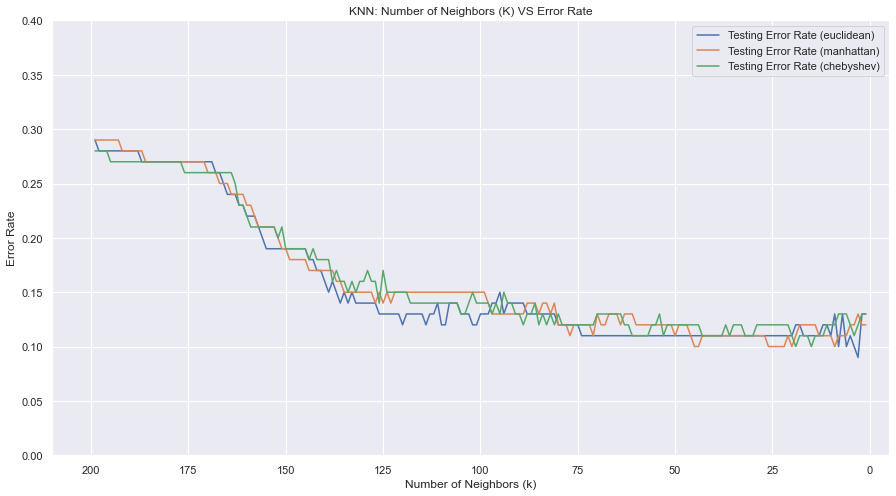

In [21]:
E_new_k_set = list(range(1,200,1))
metrics = ['euclidean', 'manhattan', 'chebyshev']

Eu_error = Weigeterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, E_new_k_set, 'euclidean');
Ma_error = Weigeterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, E_new_k_set, 'manhattan');
Ch_error = Weigeterrors(Training_data_x, Training_data_y, test_data_x, \
                             test_data_y, E_new_k_set, 'chebyshev');

Eu_K = Eu_error[2]
Ma_K = Ma_error[2]
Ch_K = Ch_error[2]

print('The best error for euclidean is: '+ str(min(Eu_error[1])) +'. The optimal K value is: ' + str(Eu_K))
print('The best error for manhattan is: '+ str(min(Ma_error[1])) +'. The optimal K value is: ' + str(Ma_K))
print('The best error for chebyshev is: '+ str(min(Ch_error[1])) +'. The optimal K value is: ' + str(Ch_K))
plt.title('KNN: Number of Neighbors (K) VS Error Rate')
plt.plot(E_new_k_set, Eu_error[1], label = 'Testing Error Rate (euclidean)');
plt.axis([max(E_new_k_set),min(E_new_k_set),min(Eu_error[1]),max(Eu_error[1])])
plt.ylim((0,0.4))
plt.xlim((210,-5))
plt.plot(E_new_k_set, Ma_error[1], label = 'Testing Error Rate (manhattan)');
plt.plot(E_new_k_set, Ch_error[1], label = 'Testing Error Rate (chebyshev)');

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.legend();

    Answer: The best error is: 0.08999999999999997. The optimal K value is: 3 for euclidean

### (f) What is the lowest training error rate you achieved in this homework?

    Answer: The lowest training error rate in this homework is 0.06 for p=3.981072 using Minkowski Distance of uniform weight. The optimal K value is 4. 